<a href="https://colab.research.google.com/github/sushantkumar-estech/Classification-of-MNIST-dataset-of-Handwritten-digits-using-DNN-with-Pytorch/blob/master/MNIST_HandwrittenDataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
print(torch.__version__)

1.6.0+cu101


In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# MNIST IMAGE FILE, then convert them to Tensor

In [6]:
transform = transforms.ToTensor()

In [7]:
# Mounting the drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
train_data = datasets.MNIST(root = '/content/drive/My Drive/ML_Dataset/Pytorch_dataset', train=True, download=True, transform=transform)

In [9]:
test_data = datasets.MNIST(root = '/content/drive/My Drive/ML_Dataset/Pytorch_dataset', train=False, download=True, transform=transform)

In [12]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/My Drive/ML_Dataset/Pytorch_dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/My Drive/ML_Dataset/Pytorch_dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [14]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [15]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [16]:
type(train_data[0])

tuple

In [17]:
image , label = train_data[0]

In [18]:
image.shape   #its a grey scale image with 28X28 pixels and one channel

torch.Size([1, 28, 28])

In [19]:
label

5

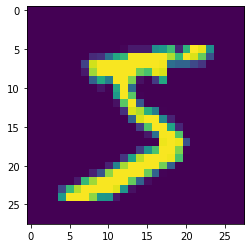

In [20]:
plt.imshow(image.reshape((28,28)))  # can displax the image
# the color mapping for matplotlib is virdis, thus it is showing the image like this

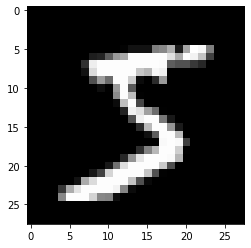

In [21]:
plt.imshow(image.reshape((28,28)), cmap='gray')

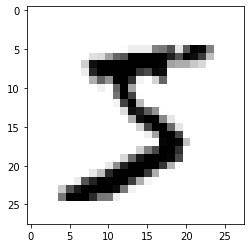

In [22]:
plt.imshow(image.reshape((28,28)), cmap='gist_yarg')

In [23]:
torch.manual_seed(101)
#making batch of the data beforefeeding it to the network
train_loader = DataLoader(train_data, batch_size = 100, shuffle=True)

test_loader = DataLoader(test_data, batch_size = 500, shuffle=False)

In [24]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}'))

In [25]:
# will display only 1st batch, so here is the quick trick to grab the first batch
for images,labels in train_loader:
    break

In [26]:
images.shape

torch.Size([100, 1, 28, 28])

In [27]:
labels.shape

torch.Size([100])

Labels: [   0    5    7    8    6    7    9    7    1    3    8    4]


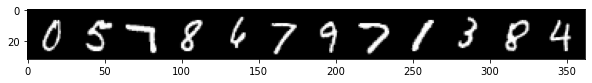

In [28]:
# Print the first 12 labels using numpy
print('Labels:', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12) # the defaulr nrow is 8
plt.figure(figsize=(10,4))

# we need to transpose the image from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

In [29]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)  # Multiclass classification

In [30]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [31]:
for param in model.parameters():
    print(param.numel());

94080
120
10080
84
840
10


In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [33]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [34]:
images.shape

torch.Size([100, 1, 28, 28])

In [35]:
# we need to flatten down this image as this will feed to the Networks input Neurons
images.view(100,-1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [36]:
images.view(100,-1).shape # Flattened down the images

torch.Size([100, 784])

In [37]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%100 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  100 [ 10000/60000]  loss: 0.59479666  accuracy:  76.050%
epoch:  0  batch:  200 [ 20000/60000]  loss: 0.27582586  accuracy:  83.090%
epoch:  0  batch:  300 [ 30000/60000]  loss: 0.32799637  accuracy:  85.860%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.21671525  accuracy:  87.373%
epoch:  0  batch:  500 [ 50000/60000]  loss: 0.09122671  accuracy:  88.598%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.21335365  accuracy:  89.388%
epoch:  1  batch:  100 [ 10000/60000]  loss: 0.24585846  accuracy:  94.630%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.13939004  accuracy:  94.710%
epoch:  1  batch:  300 [ 30000/60000]  loss: 0.08989627  accuracy:  95.013%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.12105043  accuracy:  95.200%
epoch:  1  batch:  500 [ 50000/60000]  loss: 0.17801875  accuracy:  95.356%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.11984859  accuracy:  95.427%
epoch:  2  batch:  100 [ 10000/60000]  loss: 0.05541075  accuracy:  96.460%
epoch:  2  b

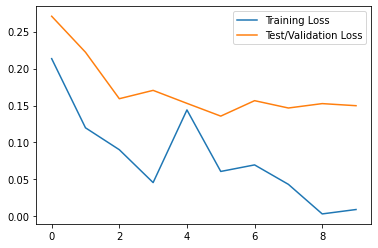

In [38]:
plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label = 'Test/Validation Loss')
plt.legend()

In [39]:
train_correct

[tensor(53633),
 tensor(57256),
 tensor(58059),
 tensor(58536),
 tensor(58790),
 tensor(59015),
 tensor(59204),
 tensor(59357),
 tensor(59422),
 tensor(59510)]

In [40]:
test_correct

[tensor(9438),
 tensor(9629),
 tensor(9713),
 tensor(9711),
 tensor(9720),
 tensor(9756),
 tensor(9768),
 tensor(9774),
 tensor(9746),
 tensor(9769)]

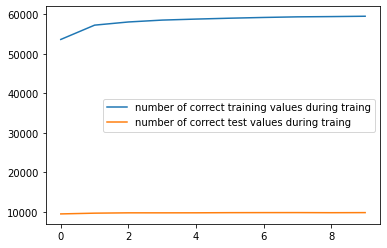

In [41]:
plt.plot(train_correct, label = 'number of correct training values during traing')
plt.plot(test_correct, label = 'number of correct test values during traing')
plt.legend()

In [43]:
train_acc = [t//600 for t in train_correct]
test_acc = [t//100 for t in test_correct]

In [44]:
train_acc

[tensor(89),
 tensor(95),
 tensor(96),
 tensor(97),
 tensor(97),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(99),
 tensor(99)]

In [45]:
test_acc

[tensor(94),
 tensor(96),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97)]

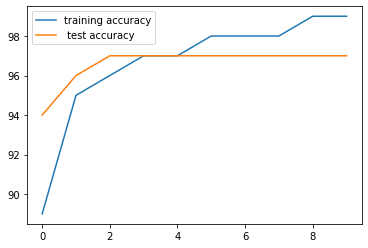

In [46]:
plt.plot(train_acc, label = 'training accuracy')
plt.plot(test_acc, label = ' test accuracy')
plt.legend()

In [47]:
# New UNSEEN DATA

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [48]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [49]:
correct

tensor(9769)

In [50]:
(correct.item()/len(X_test))*100

97.69

In [51]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 967,    0,    1,    1,    2,    2,    5,    1,    5,    2],
       [   0, 1122,    3,    1,    0,    0,    3,    3,    0,    2],
       [   2,    3, 1008,    0,    1,    0,    2,    7,    2,    0],
       [   3,    2,    6,  998,    1,   15,    1,    1,    3,    7],
       [   1,    0,    2,    0,  967,    2,   11,    1,    3,   13],
       [   0,    1,    0,    2,    0,  864,    6,    0,    4,    4],
       [   1,    2,    1,    0,    3,    3,  927,    0,    1,    0],
       [   1,    1,    2,    4,    2,    1,    0, 1012,    6,   17],
       [   4,    4,    9,    3,    2,    5,    3,    2,  947,    7],
       [   1,    0,    0,    1,    4,    0,    0,    1,    3,  957]])